In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/Users/nishanthsundaran/intelligent/AQI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/nishanthsundaran/intelligent/AQI/station_day.csv
/Users/nishanthsundaran/intelligent/AQI/ChennaiAQI_model.pkl
/Users/nishanthsundaran/intelligent/AQI/.DS_Store
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_CO.pkl
/Users/nishanthsundaran/intelligent/AQI/city_day.csv
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_pm2_5.pkl
/Users/nishanthsundaran/intelligent/AQI/stations.csv
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_O3.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model.pkl
/Users/nishanthsundaran/intelligent/AQI/manoj.html
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_SO2.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_pm10.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima5_modelAQICHENNAI.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_NO2.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/GUI sarima.ipynb
/Users/nishanthsundaran/intelligent/AQI/saved mode

In [2]:
# Load the dataset
df = pd.read_csv("city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,26219,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,2018-03-22 02:31:12.016476672,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-02-21 00:00:00,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,2018-06-14 00:00:00,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,2019-06-26 00:00:00,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,2020-05-01 00:00:00,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064


In [4]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,26219,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,2018-03-22 02:31:12.016476672,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-02-21 00:00:00,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,2018-06-14 00:00:00,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,2019-06-26 00:00:00,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,2020-05-01 00:00:00,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064


In [5]:
df=df[['City','Date','AQI','AQI_Bucket']]

In [6]:
cities=pd.unique(df['City'])
column1= cities+'_AQI'
column2=cities+'_AQI_Bucket'
columns=[*column1,*column2]

In [7]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-05-02',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['AQI']))
    final_df[i][-n:]=np.array(df[df['City']==city]['AQI'])

In [8]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [9]:
final_df.tail()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Delhi_AQI,...,Jaipur_AQI,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI
2020-01-01,294.111111,NaN,88.032258,104.806452,95.322581,160.516129,155.518519,94.064516,87.516129,308.451613,...,112.451613,162.935484,156.111111,216.935484,272.645161,168.645161,262.838710,68.619048,301.413793,78.258065
2020-02-01,547.689655,NaN,67.103448,128.740741,96.482759,128.620690,136.370370,93.379310,78.137931,262.137931,...,125.241379,167.000000,121.068966,197.724138,216.655172,159.206897,201.206897,93.576923,192.321429,88.620690
2020-03-01,277.466667,65.350000,52.548387,83.733333,90.741935,109.714286,124.100000,55.419355,70.290323,135.838710,...,100.935484,163.166667,129.166667,122.838710,134.000000,104.645161,158.419355,67.870968,117.250000,74.741935
2020-04-01,120.733333,39.233333,44.400000,58.708333,68.533333,113.782609,137.923077,44.586207,63.500000,113.000000,...,86.200000,121.400000,77.033333,70.366667,106.733333,74.333333,131.166667,75.750000,132.137931,57.066667
2020-05-01,134.000000,20.000000,54.000000,109.000000,75.000000,121.000000,106.000000,59.000000,65.000000,144.000000,...,163.000000,110.000000,56.000000,69.000000,82.000000,64.000000,118.000000,NaN,101.000000,82.000000


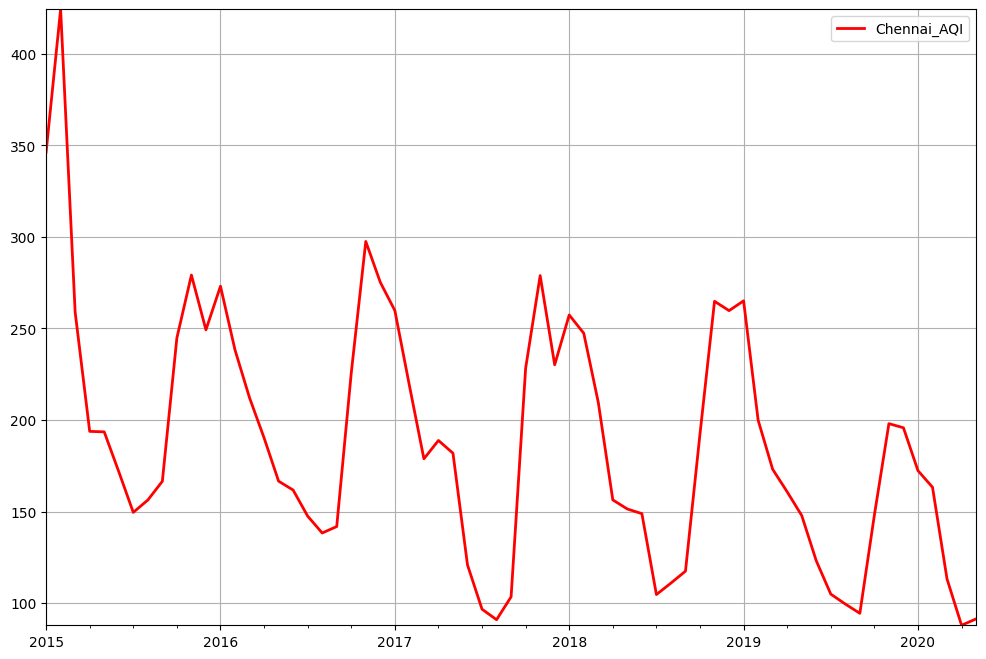

In [10]:
final_df['Chennai_AQI']=final_df.mean(axis=1)
ax=final_df[['Chennai_AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [11]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Delhi_AQI,...,Jaipur_AQI,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI
2019-01-01,755.516129,NaN,218.612903,94.633333,116.806452,NaN,259.967742,NaN,265.094940,365.741935,...,150.290323,324.612903,NaN,360.838710,315.516129,165.516129,405.290323,NaN,289.400000,128.161290
2019-02-01,560.535714,NaN,114.464286,94.892857,106.250000,NaN,208.259259,NaN,199.934698,258.178571,...,118.714286,187.214286,NaN,266.071429,243.071429,149.821429,296.107143,NaN,322.555556,88.428571
2019-03-01,601.741935,NaN,79.967742,99.733333,122.129032,NaN,186.870968,NaN,173.111320,197.354839,...,106.774194,148.413793,NaN,157.774194,217.645161,123.483871,214.032258,NaN,189.888889,88.838710
2019-04-01,633.518519,NaN,78.133333,112.000000,124.300000,NaN,190.562500,NaN,160.796276,219.400000,...,151.000000,117.758621,NaN,86.800000,217.700000,98.066667,151.100000,NaN,142.160000,69.933333
2019-05-01,412.769231,NaN,106.777778,113.258065,105.387097,NaN,130.464286,NaN,147.874898,235.838710,...,142.161290,130.555556,NaN,88.548387,184.096774,87.870968,170.806452,NaN,130.413793,75.419355


In [12]:
df_2019.isna().sum()

Ahmedabad_AQI              0
Aizawl_AQI                13
Amaravati_AQI              1
Amritsar_AQI               0
Bengaluru_AQI              0
Bhopal_AQI                 8
Brajrajnagar_AQI           0
Chandigarh_AQI             8
Chennai_AQI                0
Delhi_AQI                  0
Ernakulam_AQI             12
Gurugram_AQI               0
Guwahati_AQI               1
Hyderabad_AQI              0
Jaipur_AQI                 0
Jorapokhar_AQI             1
Kochi_AQI                 12
Kolkata_AQI                0
Lucknow_AQI                0
Mumbai_AQI                 0
Patna_AQI                  0
Shillong_AQI               8
Talcher_AQI                0
Thiruvananthapuram_AQI     0
dtype: int64

In [13]:
df_2019=df_2019.drop(['Amaravati_AQI','Amritsar_AQI','Ahmedabad_AQI','Bengaluru_AQI','Aizawl_AQI','Bhopal_AQI','Brajrajnagar_AQI','Chandigarh_AQI','Delhi_AQI','Gurugram_AQI','Guwahati_AQI','Hyderabad_AQI','Jaipur_AQI','Jorapokhar_AQI','Ernakulam_AQI','Kolkata_AQI','Lucknow_AQI','Mumbai_AQI','Patna_AQI','Shillong_AQI','Kochi_AQI','Talcher_AQI','Thiruvananthapuram_AQI',],axis=1)

In [14]:
AQI_2019=df_2019.mean(axis=0)

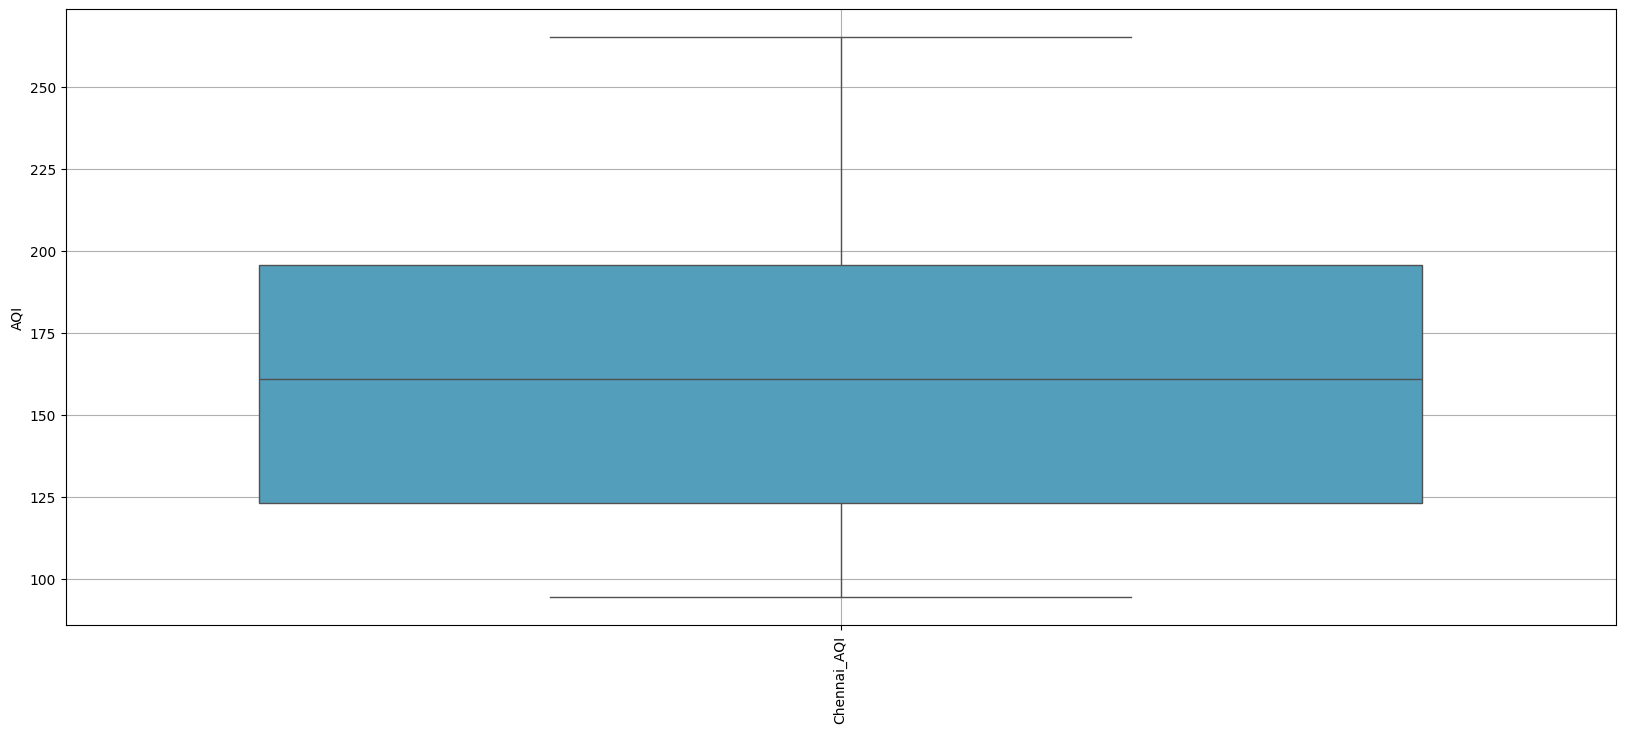

In [15]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('AQI');
bplot.grid(True)

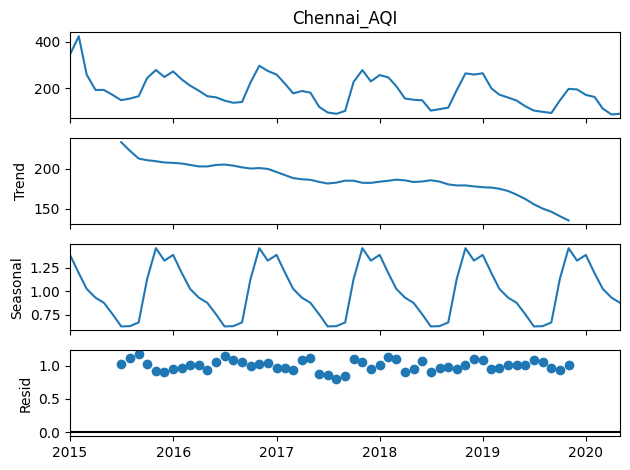

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
Chennai_AQI=final_df['Chennai_AQI']
result=seasonal_decompose(Chennai_AQI,model='multiplicative')
result.plot();

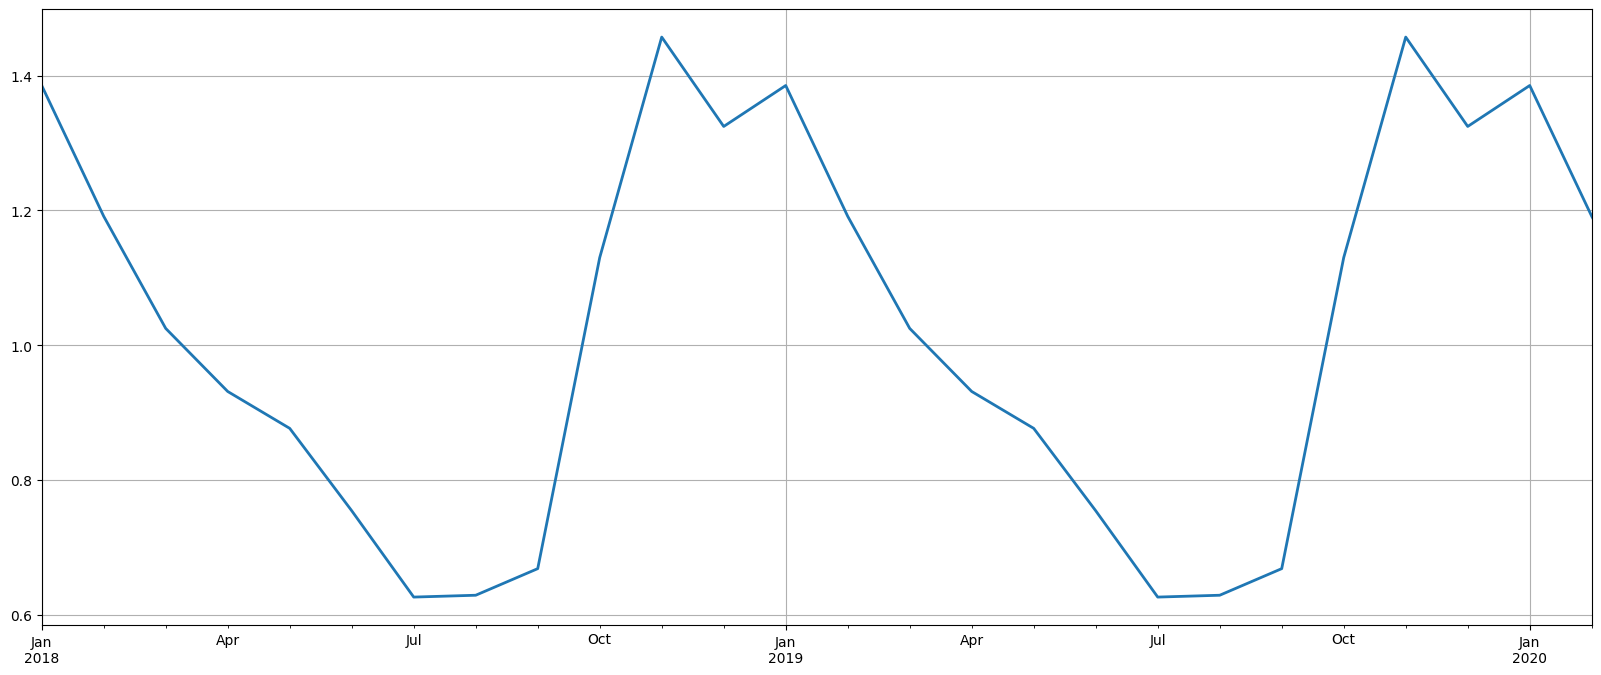

In [17]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [18]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima;
from pmdarima import auto_arima;                              # for determining ARIMA orders

In [19]:
auto_arima(y=Chennai_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   65
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -317.367
Date:                              Sun, 21 Jan 2024   AIC                            640.734
Time:                                      15:56:50   BIC                            647.211
Sample:                                  01-01-2015   HQIC                           643.286
                                       - 05-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9665      0.066     14.574      0.000       0.837       1.097
ma.S.L12      -0.7031      0.279     -2.524      0.012      -1.249      -0.157
sigma2       964.6870    206.343      4.675      0.000     560.262    1369.112
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                17.23
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
len(Chennai_AQI)

65

In [21]:
#dividing into train and test:
train=Chennai_AQI[:41]
test=Chennai_AQI[42:54] 



In [22]:
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.09475D+00    |proj g|=  2.10777D-01

At iterate    5    f=  5.02489D+00    |proj g|=  2.57308D-02

At iterate   10    f=  4.99976D+00    |proj g|=  5.62110D-03

At iterate   15    f=  4.99509D+00    |proj g|=  4.51974D-04

At iterate   20    f=  4.99506D+00    |proj g|=  9.60821D-04

At iterate   25    f=  4.99502D+00    |proj g|=  2.33118D-03

At iterate   30    f=  4.99495D+00    |proj g|=  4.80406D-04

At iterate   35    f=  4.99495D+00    |proj g|=  1.41307D-05

At iterate   40    f=  4.99495D+00    |proj g|=  1.79705D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Chennai_AQI   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -204.793
Date:                            Sun, 21 Jan 2024   AIC                            419.586
Time:                                    15:56:50   BIC                            428.030
Sample:                                01-01-2015   HQIC                           422.639
                                     - 05-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6704      0.203     -3.310      0.001      -1.067      -0.273
ma.L1          0.9999     16.611      0.060      0.952     -31.557      33.557
ar.S.L12       0.9309      0.266      3.503      0.000       0.410       1.452
ma.S.L12      -0.6349      0.693     -0.916      0.360      -1.993       0.723
sigma2      1297.5231   2.14e+04      0.061      0.952   -4.06e+04    4.31e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.37   Jarque-Bera (JB):                12.75
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -0.66
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
#Obtaining predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

<Axes: >

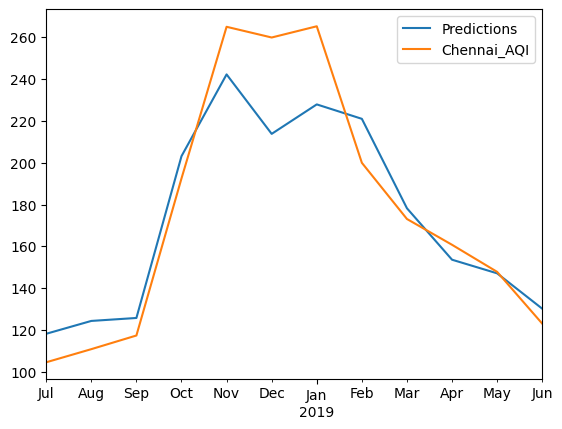

In [24]:
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True)

In [25]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean AQI',test.mean())

RMSE =  20.697421010617663
Mean AQI 176.68763588530945


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.15850D+00    |proj g|=  1.09122D-01

At iterate    5    f=  5.11852D+00    |proj g|=  3.68115D-02

At iterate   10    f=  5.10566D+00    |proj g|=  2.07136D-02

At iterate   15    f=  5.09545D+00    |proj g|=  1.50545D-02


 This problem is unconstrained.



At iterate   20    f=  5.08652D+00    |proj g|=  1.70715D-02

At iterate   25    f=  5.00636D+00    |proj g|=  1.06824D-01

At iterate   30    f=  4.90848D+00    |proj g|=  1.39240D-02

At iterate   35    f=  4.89412D+00    |proj g|=  1.46016D-02

At iterate   40    f=  4.89318D+00    |proj g|=  1.62420D-03

At iterate   45    f=  4.89314D+00    |proj g|=  1.91687D-03

At iterate   50    f=  4.89121D+00    |proj g|=  1.39563D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     65      1     0     0   1.396D-02   4.891D+00
  F =   4.8912083414676628     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Users/nishanthsundaran/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


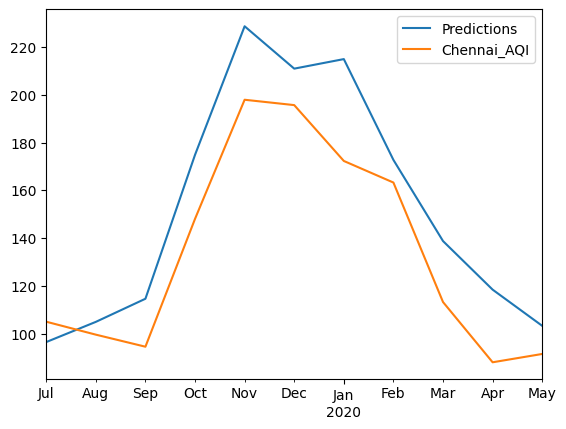

In [26]:
#dividing into train and test:
train=Chennai_AQI[:53]
test=Chennai_AQI[54:]
# Forming the model:
model=SARIMAX(train,order=(5,5,5),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=54, end=64, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True);

In [27]:
#Finding RMSE:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean AQI',test.mean())

RMSE =  23.443352815004367
Mean AQI 133.55768465497644


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73599D+00    |proj g|=  1.23392D+00

At iterate    5    f=  6.25300D+00    |proj g|=  5.03926D-02


 This problem is unconstrained.



At iterate   10    f=  6.23318D+00    |proj g|=  4.55429D-03

At iterate   15    f=  5.70532D+00    |proj g|=  7.83699D-01

At iterate   20    f=  5.43677D+00    |proj g|=  2.02408D-02

At iterate   25    f=  5.43467D+00    |proj g|=  1.98774D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     38      1     0     0   1.988D-06   5.435D+00
  F =   5.4346700347133776     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


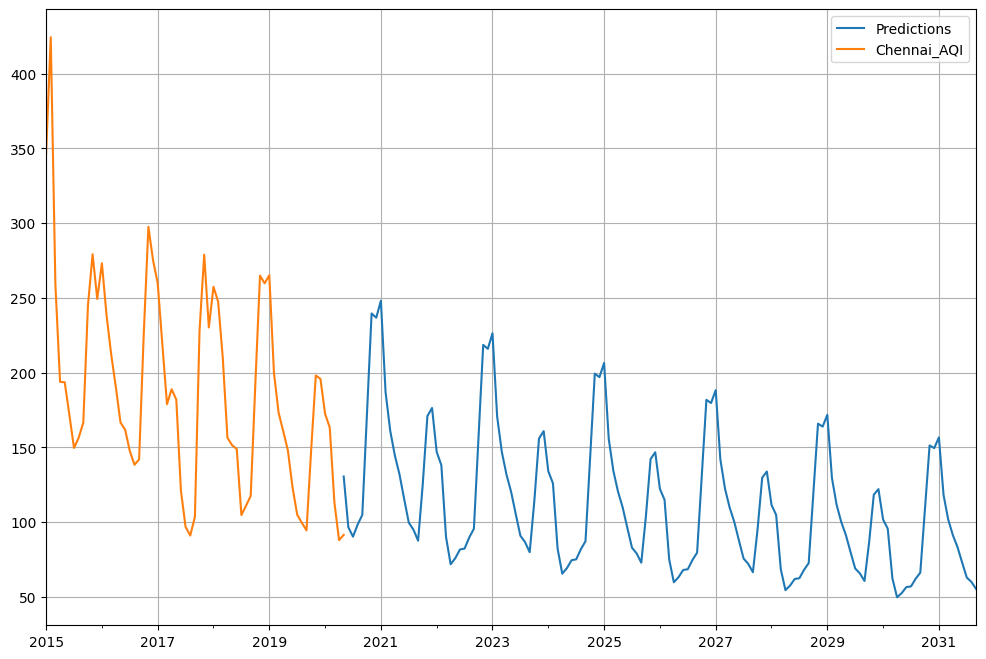

In [28]:
# Forming the model:
model=SARIMAX(Chennai_AQI,order=(0,0,1),seasonal_order=(1,0,1,24))
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=200, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
Chennai_AQI.plot(legend=True,figsize=(12,8),grid=True);

In [29]:
import pickle

# Assuming 'results' is your trained SARIMA model
# Train the SARIMA model on the entire dataset
#model = SARIMAX(final_df['India_AQI'], order=(1,1,1), seasonal_order=(2,1,2,24))
#results = model.fit()

with open('/Users/nishanthsundaran/intelligent/AQI/ChennaiAQI_model.pkl', 'wb') as file:
    pickle.dump(results, file)

In [30]:
import pickle
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the saved SARIMAX model
with open('/Users/nishanthsundaran/intelligent/AQI/ChennaiAQI_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Extend the time index to include the forecast period
extended_index = pd.date_range(start='2015-01-01', end='2025-12-31', freq='MS')

# Specify the specific date for forecasting
specific_date = '2024-01-01'

# Check if the specific date is within the range of the extended index
if pd.to_datetime(specific_date) not in extended_index:
    raise ValueError(f"'specific_date' should be within the range of the extended index.")

# Make predictions using the loaded model for the specific date
forecast = loaded_model.get_prediction(start=extended_index.get_loc(specific_date), end=extended_index.get_loc(specific_date), dynamic=False)
predicted_value = forecast.predicted_mean[0]

# Display the forecasted CO value for the specified date
print(f"The forecasted AQI value for {specific_date} is: {predicted_value}")


The forecasted AQI value for 2024-01-01 is: 134.00985364225443
